In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_DATA/",one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_DATA/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_DATA/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_DATA/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_DATA/t10k-labels-idx1-ubyte.gz


In [4]:
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [6]:
mnist.test.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
single_image = mnist.train.images[9].reshape(28,28)

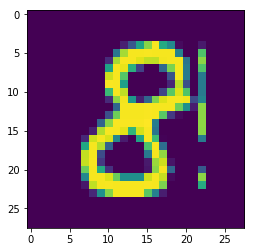

In [17]:
plt.imshow(single_image)

In [18]:
#CREATING PLACEHOLDERS
x = tf.placeholder(tf.float32, shape=[None, 784])

In [19]:
#CREATING VARIABLES
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [20]:
y = tf.matmul(x,W) + b

In [21]:
#LOSS FUNCTION
y_true = tf.placeholder(tf.float32, [None,10])

In [23]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y))

In [24]:
#OPTIMIZER
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cross_entropy)

In [25]:
#CREATE SESSION
init = tf.global_variables_initializer()

In [27]:
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(1000):
        batch_x, batch_y = mnist.train.next_batch(100)
        
        sess.run(train, feed_dict={x:batch_x, y_true:batch_y})
    
    #EVALUATE THE MODEL
    correct_pred = tf.equal(tf.arg_max(y,1), tf.arg_max(y_true,1))
    
    # [True, False ... False] --> [1,0,0]
    acc = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    
    print(sess.run(acc, feed_dict={x:mnist.test.images, y_true:mnist.test.labels}))

Instructions for updating:
Use `argmax` instead
Instructions for updating:
Use `argmax` instead
0.9184
